
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/udemy_courses_clean.csv"
file_type = "csv"

# Let's read the data

df = spark.read.csv(file_location,header=True,inferSchema=True)



In [0]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- course_id: string (nullable = true)
 |-- course_title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_lectures: string (nullable = true)
 |-- level: string (nullable = true)
 |-- content_duration: string (nullable = true)
 |-- published_timestamp: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- clean_course_title: string (nullable = true)



In [0]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [0]:
# Value Counts via pandas
df.toPandas()['subject'].value_counts()

Out[5]: Web Development                                                                                                                                                                                              1200
Business Finance                                                                                                                                                                                             1198
Musical Instruments                                                                                                                                                                                           676
Graphic Design                                                                                                                                                                                                603
Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Fore

In [0]:
# Removing the subjects where value counts is 1

df = df.where(df.subject.isin(df.groupBy('subject').count().filter('count > 1').select('subject').rdd.flatMap(lambda x: x).collect()))
df.toPandas()['subject'].value_counts()

Out[6]: Web Development        1200
Business Finance       1198
Musical Instruments     676
Graphic Design          603
Name: subject, dtype: int64

In [0]:
# Check For Missing Values
df.toPandas()['subject'].isnull().sum()

Out[7]: 0

In [0]:
df.show(5)

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

### Feature Extraction
#### Build Features From Text
+ CountVectorizer
+ TFIDF
+ WordEmbedding
+ HashingTF
+ etc

In [0]:
# Load Our Pkgs
import pyspark.ml.feature

In [0]:
dir(pyspark.ml.feature)

Out[10]: ['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'P

In [0]:
# Load Our Transformer & Extractor Pkgs
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [0]:
df.show(5)

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [0]:
# Stages For the Pipeline
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')


In [0]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [0]:
labelEncoder.transform(df).show(5)

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|label|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|  1.0|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 ho

In [0]:
labelEncoder.labels

Out[16]: ['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design']

In [0]:
# Dict of Labels
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

In [0]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [0]:
df = labelEncoder.transform(df)

In [0]:
df.show(5)

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|label|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|  1.0|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 ho

In [0]:
### Split Dataset
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [0]:
trainDF.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|label|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|  1.0|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 ho

In [0]:
### Estimator
from pyspark.ml.classification import LogisticRegression

In [0]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

#### Building the Pipeline

In [0]:
from pyspark.ml import Pipeline

In [0]:
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])

In [0]:
pipeline

Out[27]: Pipeline_9dd37bd3b129

In [0]:
pipeline.stages

Out[28]: Param(parent='Pipeline_9dd37bd3b129', name='stages', doc='a list of pipeline stages')

In [0]:
# Building MOdel
lr_model = pipeline.fit(trainDF)

In [0]:
lr_model

Out[30]: PipelineModel_35d3191a037f

In [0]:
# Predictions on our Test Dataset
predictions = lr_model.transform(testDF)

In [0]:
predictions.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+-

In [0]:
# Select Columns
predictions.columns

Out[33]: ['_c0',
 'course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject',
 'clean_course_title',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [0]:
predictions.select('rawPrediction','probability','subject','label','prediction').show(10)

+--------------------+--------------------+----------------+-----+----------+
|       rawPrediction|         probability|         subject|label|prediction|
+--------------------+--------------------+----------------+-----+----------+
|[-9.9845923594106...|[3.87286496530790...|Business Finance|  1.0|       1.0|
|[-1.7142493553573...|[1.70245438750334...|Business Finance|  1.0|       1.0|
|[-10.002346844648...|[2.49300696150881...|Business Finance|  1.0|       1.0|
|[-7.7426349008405...|[1.21836186984019...|Business Finance|  1.0|       1.0|
|[-6.0189609499583...|[5.53315134062156...|Business Finance|  1.0|       1.0|
|[-7.5152871791802...|[1.06995589061127...|Business Finance|  1.0|       1.0|
|[-6.5000978586735...|[8.04169376792544...|Business Finance|  1.0|       1.0|
|[-7.5038435300226...|[1.49848868712117...|Business Finance|  1.0|       1.0|
|[-1.8900968806876...|[3.27924411340737...|Business Finance|  1.0|       1.0|
|[-6.6161495293550...|[4.61374986523477...|Business Finance|  1.

### Model Evaluation
+ Accuracy
+ Precision
+ F1score
+ etc

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [0]:
accuracy = evaluator.evaluate(predictions)

In [0]:
accuracy

Out[38]: 0.9380362249761678

In [0]:
#### Method 2: Precision. F1Score (Classification Report)
from pyspark.mllib.evaluation import MulticlassMetrics

In [0]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
print("Accuracy:",lr_metric.accuracy)
print("Precision:",lr_metric.precision(1.0))
print("Recall:",lr_metric.recall(1.0))
print("F1Score:",lr_metric.fMeasure(1.0))

Accuracy: 0.9380362249761678
Precision: 0.987220447284345
Recall: 0.8853868194842407
F1Score: 0.9335347432024168


### Confusion Matrix
+ convert to pandas
+ sklearn

In [0]:
y_true = predictions.select('label')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
cm = confusion_matrix(y_true,y_pred)

In [0]:
cm

Out[45]: array([[345,  11,   2,   6],
       [  3, 309,   0,   1],
       [  4,  10, 178,   3],
       [  5,  19,   1, 152]])

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:
label_dict.keys()

Out[47]: dict_keys(['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design'])

In [0]:
class_names = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']

Confusion matrix, without normalization
[[345  11   2   6]
 [  3 309   0   1]
 [  4  10 178   3]
 [  5  19   1 152]]


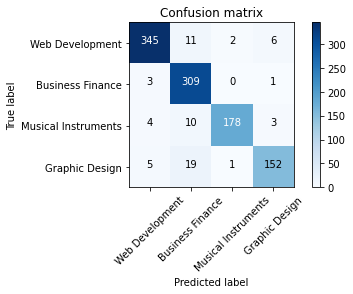

In [0]:
plot_confusion_matrix(cm,class_names)

In [0]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       364
         1.0       0.89      0.99      0.93       313
         2.0       0.98      0.91      0.95       195
         3.0       0.94      0.86      0.90       177

    accuracy                           0.94      1049
   macro avg       0.94      0.93      0.93      1049
weighted avg       0.94      0.94      0.94      1049



In [0]:
# Just as we did in jupyter notebook likewise it can be coded, the main thing is connection to big data sources like S3 and other sources and the implementation of clusters, free version gives only one but paid gives many. 